# 第3章 一般化線型モデル（GLM）---ポアソン回帰---

In [2]:
using CSV
using GLM
using Plots
using StatPlots

┌ Info: Recompiling stale cache file /Users/marui/.julia/compiled/v1.0/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/marui/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/marui/.julia/compiled/v1.0/StatPlots/iAmZm.ji for StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1190


説明変数として体サイズ（$x_i$）と施肥効果（$f_i$）、応答変数として種子数（$y_i$）があるとする。

## 3.2 観測されたデータの概要を調べる（p.41）

In [3]:
d = CSV.read("data3a.csv")

,y,x,f
,Int64⍰,Float64⍰,String⍰
1,6,8.31,C
2,6,9.44,C
3,6,9.5,C
4,12,9.07,C
5,10,10.16,C
6,4,8.32,C
7,9,10.61,C
8,9,10.06,C
9,9,9.93,C


In [4]:
describe(d)

UndefVarError: UndefVarError: describe not defined

In [5]:
d.x

100-element Array{Union{Missing, Float64},1}:
  8.31
  9.44
  9.5 
  9.07
 10.16
  8.32
 10.61
 10.06
  9.93
 10.43
 10.36
 10.15
 10.92
  ⋮   
 10.73
  8.85
 11.2 
  9.86
 11.54
 10.03
 11.88
  9.15
  8.52
 10.24
 10.86
  9.97

In [6]:
typeof(d)

DataFrames.DataFrame

In [7]:
typeof(d.x)

Array{Union{Missing, Float64},1}

In [8]:
typeof(d.f)

Array{Union{Missing, String},1}

## 3.3 統計モデリングの前にデータを図示する（p.44）

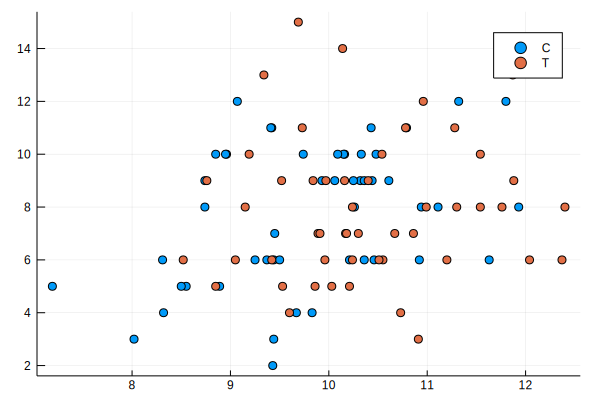

In [9]:
# 素のままのPlots.jlを使った場合
scatter(reshape(d.x, (50, 2)), reshape(d.y, (50, 2)), label=["C", "T"])

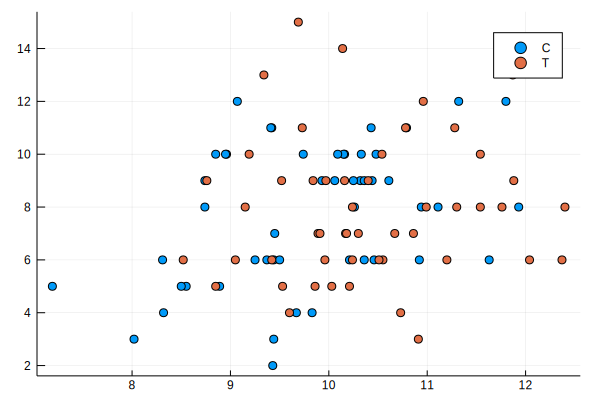

In [10]:
# StatPlots.jlを使った場合
@df d scatter(:x, :y, group=:f)

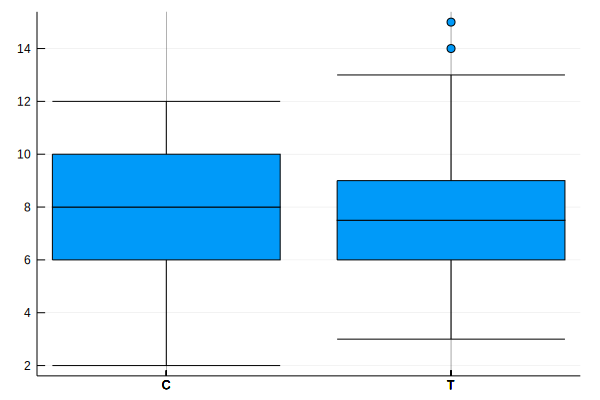

In [11]:
@df d boxplot(:f, :y, legend=false)

### 3.4.1 線形予測子と対数リンク関数（p.47）

たとえばある個体$i$の平均種子数$\lambda_i$が

$$ \lambda_i = \exp\left(\beta_1 + \beta_2 x_i\right) $$

とあらわせるとき、これを

$$ \log_e\lambda_i = \beta_1 + \beta_2 x_i $$

と変形し、右辺（$\beta_1 + \beta_2 x_i$）が**線形予測子**（_linear predictor_）、左辺の関数（$\log_e$）が**リンク関数**（_link function_）となる。

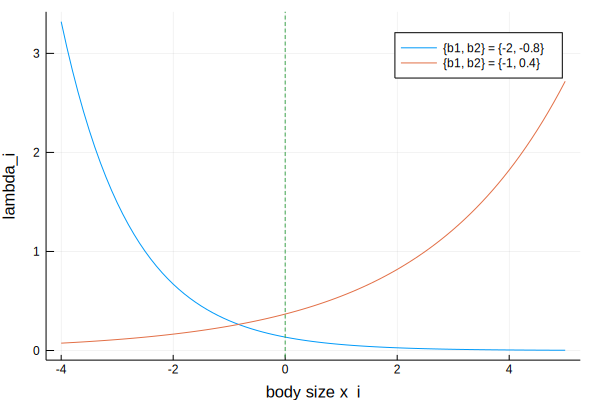

In [12]:
x = -4:0.1:5
plot(x, exp.(-2 .+ -0.8x), label="{b1, b2} = {-2, -0.8}",
  xlabel="body size x_i", ylabel="lambda_i")
plot!(x, exp.(-1 .+ 0.4x), label="{b1, b2} = {-1, 0.4}")
vline!([0], linestyle=:dash, label="")

### 3.4.2 あてはめとあてはまりの良さ（p.49）

In [13]:
fit = glm(@formula(y ~ x), d, Poisson(), LogLink())

┌ Warning: In the future eachcol will have names argument set to false by default
│   caller = evalcontrasts(::DataFrames.DataFrame, ::Dict{Any,Any}) at modelframe.jl:124
└ @ StatsModels /Users/marui/.julia/packages/StatsModels/AYB2E/src/modelframe.jl:124


StatsModels.DataFrameRegressionModel{GeneralizedLinearModel{GlmResp{Array{Float64,1},Poisson{Float64},LogLink},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: y ~ 1 + x

Coefficients:
              Estimate Std.Error z value Pr(>|z|)
(Intercept)    1.29172  0.363686 3.55174   0.0004
x            0.0756619 0.0356042 2.12509   0.0336


In [14]:
fit = glm(@formula(y ~ x + f), d, Poisson(), LogLink())

StatsModels.DataFrameRegressionModel{GeneralizedLinearModel{GlmResp{Array{Float64,1},Poisson{Float64},LogLink},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: y ~ 1 + x + f

Coefficients:
               Estimate Std.Error   z value Pr(>|z|)
(Intercept)     1.26311  0.369629   3.41722   0.0006
x             0.0800726 0.0370369   2.16197   0.0306
f: T         -0.0319994 0.0743789 -0.430221   0.6670
